In [2]:
import qevo 
from qevo import *
import numpy as np

Individual(F=0.99, history=History.manual, weights=(1, 0, 0, 0, 0), ops=[
           CPHASE([0, 1], 3, 0.99),
           CPHASE([1, 2], 3, 0.99),
           Measurement(1, [0, 2], 3, 0.99, 0.99, None),
           Measurement(2, [0, 2], 3, 0.99, 0.99, None),
           CNOT([1, 0], 3, 0.99),
           CPHASE([1, 2], 3, 0.99),
           Measurement(1, [0, 2], 3, 0.99, 0.99, None),
           Measurement(2, [0, 2], 3, 0.99, 0.99, None),
           CNOT([2, 1], 3, 0.99),
           Measurement(2, [0, 2], 3, 0.99, 0.99, None),
           CPHASE([1, 2], 3, 0.99),
           Measurement(2, [0, 2], 3, 0.99, 0.99, None),
           CPHASE([0, 1], 3, 0.99),
           CPHASE([1, 2], 3, 0.99),
           Measurement(2, [0, 2], 3, 0.99, 0.99, None),
           Measurement(1, [0, 2], 3, 0.99, 0.99, None),
           CNOT([2, 1], 3, 0.99),
           Measurement(2, [0, 2], 3, 0.99, 0.99, None),
           CPHASE([1, 2], 3, 0.99),
           Measurement(2, [0, 2], 3, 0.99, 0.99, None),
           C

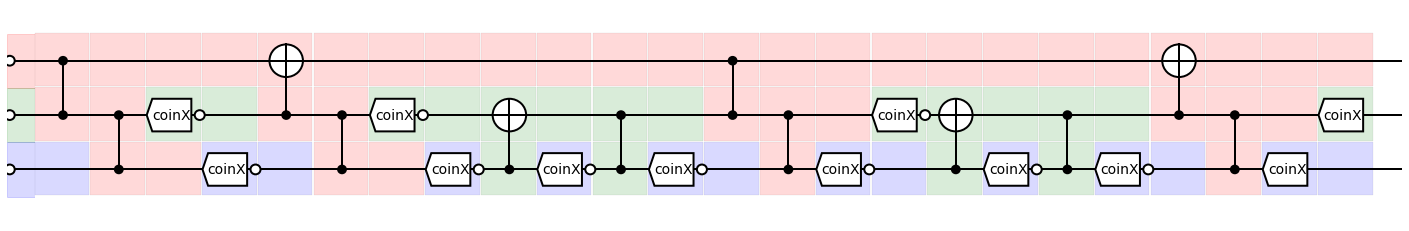

In [48]:
circ_stringent = stringent(.99, .99)
individual2plot(circ_stringent.ops, shading=True)
circ_stringent

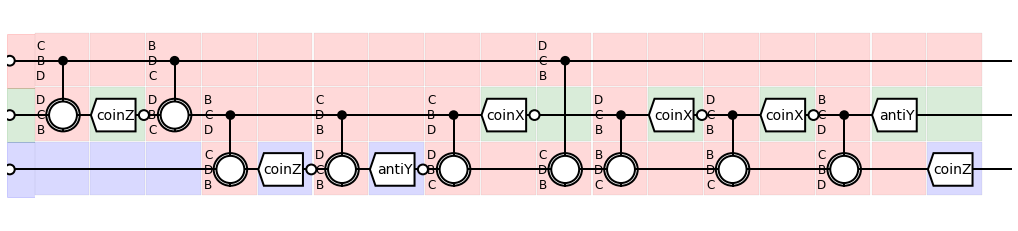

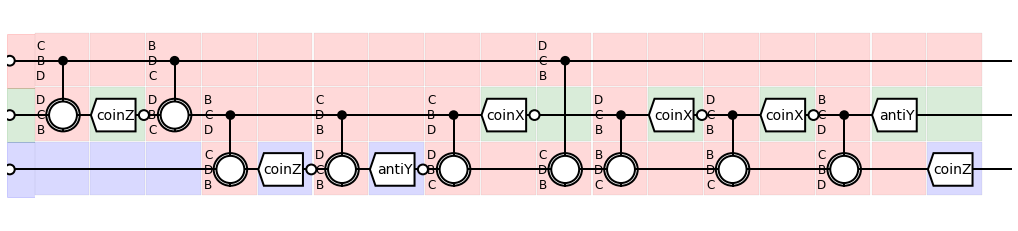

In [49]:
circ_L17=Individual(F=0.99, history=History.manual, weights=(1, 0, 0, 0, 0), ops=[
           CNOTPerm([1, 0], (0, 2, 1, 3), (0, 3, 2, 1), 3, 0.99),
           AMeasurement(1, 3, 3, 0.99, 0.99, None),
           CNOTPerm([0, 1], (0, 1, 3, 2), (0, 3, 1, 2), 3, 0.99),
           CNOTPerm([1, 2], (0, 1, 2, 3), (0, 2, 3, 1), 3, 0.99),
           AMeasurement(2, 3, 3, 0.99, 0.99, None),
           CNOTPerm([1, 2], (0, 2, 3, 1), (0, 3, 2, 1), 3, 0.99),
           AMeasurement(2, 1, 3, 0.99, 0.99, None),
           CNOTPerm([1, 2], (0, 2, 1, 3), (0, 3, 1, 2), 3, 0.99),
           AMeasurement(1, 2, 3, 0.99, 0.99, None),
           CNOTPerm([0, 2], (0, 3, 2, 1), (0, 2, 3, 1), 3, 0.99),
           CNOTPerm([1, 2], (0, 3, 2, 1), (0, 1, 3, 2), 3, 0.99),
           AMeasurement(1, 2, 3, 0.99, 0.99, None),
           CNOTPerm([1, 2], (0, 3, 2, 1), (0, 1, 3, 2), 3, 0.99),
           AMeasurement(1, 2, 3, 0.99, 0.99, None),
           CNOTPerm([1, 2], (0, 1, 2, 3), (0, 2, 1, 3), 3, 0.99),
           AMeasurement(1, 1, 3, 0.99, 0.99, None),
           AMeasurement(2, 3, 3, 0.99, 0.99, None)])
            
individual2plot(circ_L17, shading=True)

In [2]:
circ_2=Individual(F=0.99, history=History.manual, weights=(1, 0, 0, 0, 0), ops=[
           CNOTPerm([1, 0], (0, 1, 2, 3), (0, 1, 2, 3), 2, 0.97),
           AMeasurement(1, 3, 2, 0.97, 0.97, None)])

NameError: name 'Individual' is not defined

In [57]:
sum_polynomial_stringent=sum(circ_stringent.ABCD_sym_notnorm()).as_expr().subs(epsilon_g, 0.019).subs(epsilon_m, 0.019)
sum_polynomial_stringent

done24


-978795.902807844*q**13 + 4356656.4238337*q**12 - 8907644.46117889*q**11 + 11067752.0174464*q**10 - 9320598.13899419*q**9 + 5619012.86299139*q**8 - 2496486.03401696*q**7 + 828535.948523999*q**6 - 205694.74177546*q**5 + 37793.597588152*q**4 - 5005.38742582173*q**3 + 453.574155031899*q**2 - 25.2802022819059*q + 0.657303643109852

In [58]:
sum_polynomial_l17=sum(circ_L17.ABCD_sym_notnorm()).as_expr().subs(epsilon_g, 0.019).subs(epsilon_m, 0.019)
sum_polynomial_l17

done17


-12677.6501843003*q**9 + 39623.6967411397*q**8 - 54482.3457416432*q**7 + 43341.3489923253*q**6 - 22016.5006323972*q**5 + 7413.60027537109*q**4 - 1656.48786546792*q**3 + 237.229164298125*q**2 - 19.8135836387537*q + 0.74192133307034

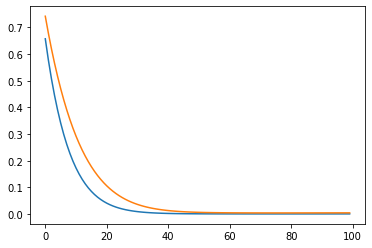

In [59]:
import matplotlib.pyplot as plt

plt.plot([sum_polynomial_stringent.subs(q, x) for x in np.linspace(0,0.33,100)])
plt.plot([sum_polynomial_l17.subs(q, x) for x in np.linspace(0,0.33,100)])

In [80]:
eq_stringent=expand_ABCDsymnotnorm(circ_stringent.ABCD_sym_notnorm(), beyond_leading_order = 1)
eq_l17=expand_ABCDsymnotnorm(circ_L17.ABCD_sym_notnorm(), beyond_leading_order = 1)

done24
done17


In [81]:
fid_stringent=eq_stringent[0].as_expr().subs(eps_p2, 0.01).subs(eps_η, 0.01)
fid_stringent

-7876*q**6 - 1565.2375*q**5 - 228.0438765625*q**4 - 23.5179116523438*q**3 - 0.846872312402344*q**2 - 0.047664333623291*q + 0.994301020780161

In [82]:
fid_l17=eq_l17[0].as_expr().subs(eps_p2, 0.01).subs(eps_η, 0.01)
fid_l17

-150*q**4 - 16.965*q**3 - 0.48736875*q**2 - 0.02719140625*q + 0.994761947851562

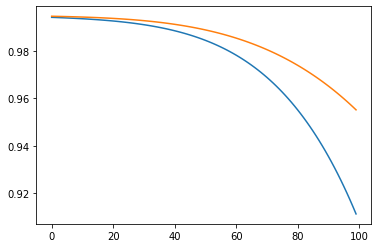

In [84]:
plt.plot([fid_stringent.subs(q, x) for x in np.linspace(0,0.1,100)])
plt.plot([fid_l17.subs(q, x) for x in np.linspace(0,.1,100)])

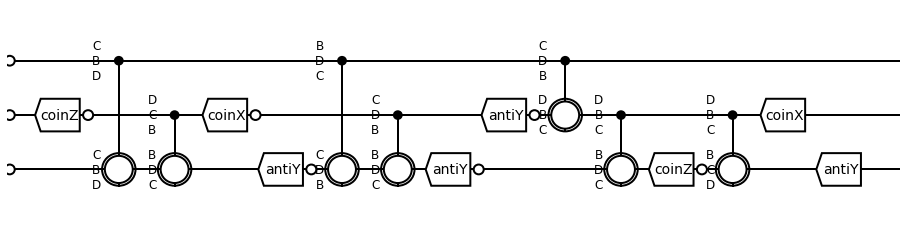

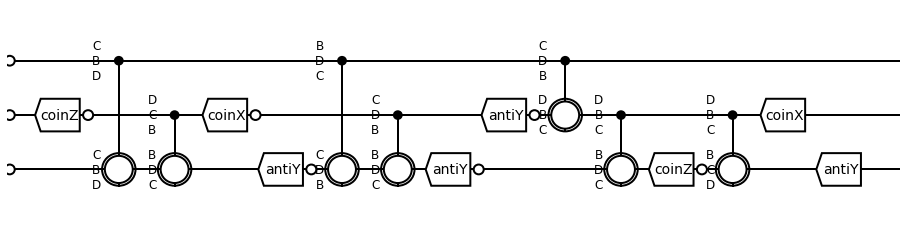

In [87]:
individual2plot(Individual(F=0.97, history=History.survivor, weights=(1, 0), ops=[
           AMeasurement(1, 3, 3, 0.97, 0.99, None),
           CNOTPerm([0, 2], (0, 2, 1, 3), (0, 2, 1, 3), 3, 0.99),
           CNOTPerm([1, 2], [0, 3, 2, 1], [0, 1, 3, 2], 3, 0.99),
           AMeasurement(1, 2, 3, 0.97, 0.99, None),
           AMeasurement(2, 1, 3, 0.97, 0.99, None),
           CNOTPerm([0, 2], (0, 1, 3, 2), (0, 2, 3, 1), 3, 0.99),
           CNOTPerm([1, 2], (0, 2, 3, 1), (0, 1, 3, 2), 3, 0.99),
           AMeasurement(2, 1, 3, 0.97, 0.99, None),
           AMeasurement(1, 1, 3, 0.97, 0.99, None),
           CNOTPerm([0, 1], (0, 2, 3, 1), (0, 3, 1, 2), 3, 0.99),
           CNOTPerm([1, 2], (0, 3, 1, 2), (0, 1, 3, 2), 3, 0.99),
           AMeasurement(2, 3, 3, 0.97, 0.99, None),
           CNOTPerm([1, 2], (0, 3, 1, 2), (0, 1, 2, 3), 3, 0.99),
           AMeasurement(1, 2, 3, 0.97, 0.99, None),
           AMeasurement(2, 1, 3, 0.97, 0.99, None)]).ops)